In [1]:
import pandas as pd
import pickle
from tqdm import tqdm
tqdm.pandas()

In [2]:
DIR_new = 'C:\\Users\\jesse\\Desktop\\Honors Project\\'

with open(DIR_new+ 'ya_reviews.pkl', 'rb') as f:
    reviews = pickle.load(f)

## Emotion Extraction of Reviews

In [5]:
tester = reviews.head(10)

In [9]:
from nrclex import NRCLex as nrc

tester['review_text'] = tester['review_text'].astype(str)
tester['nrclex'] = tester['review_text'].progress_apply(nrclex)

C:\Users\jesse\AppData\Local\Temp\ipykernel_14424\3997915532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tester['review_text'] = tester['review_text'].astype(str)
100%|██████████| 10/10 [00:00<00:00, 552.03it/s]
C:\Users\jesse\AppData\Local\Temp\ipykernel_14424\3997915532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tester['nrclex'] = tester['review_text'].progress_apply(nrclex)


In [7]:
import text2emotion as te

tester['text2emotion'] = tester['review_text'].progress_apply(lambda x: te.get_emotion(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 10/10 [00:09<00:00,  1.02it/s]
C:\Users\jesse\AppData\Local\Temp\ipykernel_14424\2069988320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tester['text2emotion'] = tester['review_text'].progress_apply(lambda x: te.get_emotion(x))


In [10]:
tester

,book_id,review_id,rating,review_text,n_votes,n_comments,all_caps,review_text_lemmatized,tokenized,bigrams,trigrams,text2emotion,nrclex
0,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,24,25,0,i crack and finally pick this up very enjoyabl...,"[crack, finally, pick, enjoyable, quick, not, ...","[(crack, finally), (finally, pick), (pick, enj...","[(crack, finally, pick), (finally, pick, enjoy...","{'Happy': 0.3, 'Angry': 0.1, 'Surprise': 0.13,...","[(positive, 0.2)]"
1,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,0,0,0,i read this book because my fifth grade son be...,"[fifth, grade, son, require, glad, !, experien...","[(fifth, grade), (grade, son), (son, require),...","[(fifth, grade, son), (grade, son, require), (...","{'Happy': 0.75, 'Angry': 0.0, 'Surprise': 0.0,...","[(trust, 0.2857142857142857), (positive, 0.285..."
2,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,0,0,0,though the book start out slow and only start ...,"[start, slow, start, interesting, towards, 100...","[(start, slow), (slow, start), (start, interes...","[(start, slow, start), (slow, start, interesti...","{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...","[(positive, 1.0)]"
3,17383543,34dc3c45d07e82718b05e73167259aef,2,"*Update - 10/27/13* - After some sleep, I thin...",0,0,0,after some sleep i think about allegiant overa...,"[sleep, think, allegiant, overall, without, in...","[(sleep, think), (think, allegiant), (allegian...","[(sleep, think, allegiant), (think, allegiant,...","{'Happy': 0.03, 'Angry': 0.16, 'Surprise': 0.1...","[(positive, 0.4358974358974359)]"
4,16651458,d8d6b590780256fef7ae4a9550fe3e0d,5,"This is a moving, heartbreaking, view into a l...",0,0,0,this be a move heartbreaking view into a life ...,"[move, heartbreaking, view, life, obese, 16, o...","[(move, heartbreaking), (heartbreaking, view),...","[(move, heartbreaking, view), (heartbreaking, ...","{'Happy': 0.17, 'Angry': 0.0, 'Surprise': 0.0,...","[(positive, 0.3125)]"
5,10782699,972ce1267de0213e3032c685386890e6,5,I never thought I would enjoy a zombie books w...,0,0,0,i never think i would enjoy a zombie book with...,"[never, think, enjoy, zombie, mix, romance, am...","[(never, think), (think, enjoy), (enjoy, zombi...","[(never, think, enjoy), (think, enjoy, zombie)...","{'Happy': 0.3, 'Angry': 0.0, 'Surprise': 0.2, ...","[(positive, 0.2916666666666667)]"
6,7260188,21063e8930ec28bc54e76f932aa30ce1,5,What a great ending to the trilogy!! The secon...,0,0,0,what a great end to the trilogy ! ! the second...,"[great, end, trilogy, !, !, second, good, awes...","[(great, end), (end, trilogy), (trilogy, !), (...","[(great, end, trilogy), (end, trilogy, !), (tr...","{'Happy': 0.33, 'Angry': 0.17, 'Surprise': 0.1...","[(anticipation, 1.0)]"
7,6148028,a19c6c44a40a88c8ff825f40118a9c7c,5,LOVED IT!!,0,0,1,love it ! !,"[love, !, !]","[(love, !), (!, !)]","[(love, !, !)]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...","[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t..."
8,2767052,c52e231744768e9d7f939d1cbeb87666,5,"Exciting, fun, entertaining! :)",0,0,0,excite fun entertaining !,"[excite, fun, entertaining, !]","[(excite, fun), (fun, entertaining), (entertai...","[(excite, fun, entertaining), (fun, entertaini...","{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...","[(positive, 0.3333333333333333), (joy, 0.33333..."
9,13206828,1d5b64fe0408bb5e1824d14631ccb5ee,5,LET'S JUST SAY I AM SO THANKFUL I HAVE THE NEX...,0,0,1,let u just say i be so thankful i have the nex...,"[let, u, thankful, beside]","[(let, u), (u, thankful), (thankful, beside)]","[(let, u, thankful), (u, thankful, beside)]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...","[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t..."


### Lexicon - "Emotion Based Literature Classification"

In [ ]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# with open('emotions.txt', 'r') as file:
#     with open('lemmatized_emotions.txt', 'w') as outfile:
#         for line in file:
#             clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
#             word, emotion = clear_line.split(':')
#             lemmatized_word = lemmatizer.lemmatize(word, pos='v')
#             outfile.write(f"'{lemmatized_word}': '{emotion.strip()}',\n")

In [17]:
def cleantokens(tokens):
    final_words = []
    for word in tokens:
        final_words.append(word)
    text = ''
    for word in final_words:
        text = text + word + ' '
    return text

def cleangrams(gram_list):
    [' '.join(gram) for gram in gram_list]


reviews['token_review_text'] = reviews['tokenized'].progress_apply(lambda x: cleantokens(x))

tester['token_review_text'] = tester['tokenized'].progress_apply(lambda x: cleantokens(x))
tester[]

100%|██████████| 10/10 [00:00<00:00, 9834.24it/s]
C:\Users\jesse\AppData\Local\Temp\ipykernel_14424\411465043.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tester['token_review_text'] = tester['tokenized'].progress_apply(lambda x: cleantokens(x))


In [15]:
import regex as re

from collections import Counter

def getEmotion(text, returnType):
    emotion_list = []
    with open('lemmatized_emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
            word, emotion = clear_line.split(':')
            for text_word in text.split(" "):
                #print(text_word)
                if text_word and not text_word.isspace() and not text_word.startswith(('*', '+')) and re.match(word, text_word):
                    emotion_list.append(emotion)

    w = Counter(emotion_list)
    subset = w.most_common(30)

    if returnType == "list":
        return subset
    elif returnType == "counter":
        return w
    else:
        return emotion_list

In [18]:
tester['lex_txt_emotions'] = tester['token_review_text'].progress_apply(lambda x: getEmotion(x, "list"))

100%|██████████| 10/10 [00:01<00:00,  9.44it/s]
C:\Users\jesse\AppData\Local\Temp\ipykernel_14424\706586795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tester['lex_txt_emotions'] = tester['token_review_text'].progress_apply(lambda x: getEmotion(x, "list"))


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english', ngram_range=(1,1))
tfidf_matrix = tfidf.fit_transform(tester['token_review_text'])

In [22]:
tester['token_review_text'][1]

'fifth grade son require glad ! experience range emotion love glad middle schoolers expose topic discuss '

In [24]:
print([tfidf_matrix[1,tfidf.vocabulary_['love']]])

[0.18279945271613146]


Low tfidf indicates a less rare word

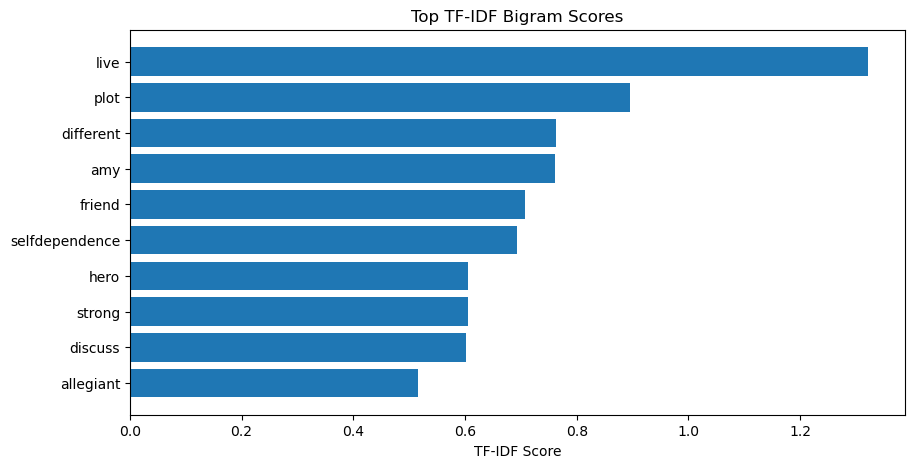

In [36]:
import numpy as np

total_scores = np.sum(tfidf_matrix, axis=0)
total_scores = np.ravel(total_scores)

feature_names = list(tfidf.vocabulary_.keys())
scores_with_bigrams = list(zip(feature_names, total_scores))

N = 10  # or any other number you prefer
top_scores = sorted(scores_with_bigrams, key=lambda x: x[1], reverse=True)[:N]

import matplotlib.pyplot as plt

bigrams, scores = zip(*top_scores)
plt.figure(figsize=(10, 5))
plt.barh(bigrams, scores)
plt.xlabel('TF-IDF Score')
plt.title('Top TF-IDF Bigram Scores')
plt.gca().invert_yaxis()
plt.show()